In [1]:
import pandas as pd

In [15]:
data_filename = "climatica_principal_res"
data_base = r"C:\Users\juanc\Source\Repos\DS4All_2020_Team28_Project\data\variables_profiles"
#data_path +=  r'\pluviometrica.csv'
data_path =  f"{data_base}\\{data_filename}.zip"
#data_path +=  r'\pluviometrica.csv'
estacion_type = data_filename

print(f"{estacion_type}: {data_path}")

climatica_principal_res: C:\Users\juanc\Source\Repos\DS4All_2020_Team28_Project\data\variables_profiles\climatica_principal_res.zip


In [3]:
data = pd.read_csv(data_path, nrows = 5)
data.head()

#columns = data.columns
#",".join([f'"{col}":"category"' for col in columns])

,CodigoEstacion,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-01 00:00,20.8,50,NaN,900
1,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-02 00:00,24.2,50,NaN,900
2,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-03 00:00,22.2,50,NaN,900
3,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-04 00:00,21.2,50,NaN,900
4,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-05 00:00,20.0,50,NaN,900


In [4]:
IDEAM_data_dtypes = {
    "CodigoEstacion":"category",
    #"NombreEstacion":"category",
    #"Latitud":"category",
    #"Longitud":"category",
    #"Altitud":"category",
    #"Categoria":"category",
    #"Entidad":"category",
    #"AreaOperativa":"category",
    #"Departamento":"category",
    #"Municipio":"category",
    #"FechaInstalacion":"category",
    #"FechaSuspension":"category",
    "IdParametro":"category",
    "Etiqueta":"category",
    "DescripcionSerie":"category",
    "Frecuencia":"category",
    #"Fecha":"category",
    #"Valor":"category",
    "Grado":"category",
    "Calificador":"category",
    "NivelAprobacion":"category"
}

IDEAM_data_usecols = {
    "CodigoEstacion",
    "IdParametro",
    "Etiqueta",
    "DescripcionSerie",
    "Frecuencia",
    "Fecha",
    "Valor",
    "Grado",
    "Calificador",
    "NivelAprobacion"
}


In [6]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M')
data = pd.read_csv(data_path, 
            usecols = IDEAM_data_usecols, 
            dtype = IDEAM_data_dtypes, 
            parse_dates=["Fecha"],
            date_parser=dateparse
                  )


<ipython-input-6-3de4a6bf0579>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240194 entries, 0 to 1240193
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   CodigoEstacion    1240194 non-null  category      
 1   IdParametro       1240194 non-null  category      
 2   Etiqueta          1240194 non-null  category      
 3   DescripcionSerie  1240194 non-null  category      
 4   Frecuencia        1240194 non-null  category      
 5   Fecha             1240194 non-null  datetime64[ns]
 6   Valor             1240194 non-null  float64       
 7   Grado             1240194 non-null  category      
 8   Calificador       455 non-null      category      
 9   NivelAprobacion   1240194 non-null  category      
dtypes: category(8), datetime64[ns](1), float64(1)
memory usage: 28.4 MB


In [8]:
data.head()

,CodigoEstacion,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-01,20.8,50,NaN,900
1,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-02,24.2,50,NaN,900
2,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-03,22.2,50,NaN,900
3,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-04,21.2,50,NaN,900
4,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-05,20.0,50,NaN,900


In [9]:
print(f"{estacion_type}: {data_path}")
data.to_csv(f"{data_base}\\{data_filename}_res2.csv", date_format='%Y-%m-%d', index = False)

climatica_principal_res: C:\Users\juanc\Source\Repos\DS4All_2020_Team28_Project\data\variables\climatica_principal_res.zip


In [10]:
pd.pivot_table(data, values="CodigoEstacion", index=["Etiqueta", "DescripcionSerie"],
                    columns=["Frecuencia"], aggfunc="count",margins=True)

,Frecuencia,Diaria,Indeterminado,All
Etiqueta,DescripcionSerie,,,
TMN_CON,Temperatura mínima diaria,634870.0,NaN,634870
TMX_CON,Temperatura máxima diaria,602177.0,3147.0,605324
All,,1237047.0,3147.0,1240194


In [16]:
etiqueta_perfil = "TMX_CON"
variable_perfil = "Temperatura máxima diaria"
data_estacion_year = \
    (data[ (data.Etiqueta == etiqueta_perfil)]
     .groupby(["CodigoEstacion", data.Fecha.dt.year])["Valor"]
     .size()
     .rename_axis(["CodigoEstacion","year"])
     .unstack()
    )

data_estacion_year.head()

year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
CodigoEstacion,,,,,,,,,,,,,,,,,,,,,
12045010,334,360,310,351,311,0,0,0,0,0,...,363,274,365,362,363,182,270,363,361,139
13015030,0,0,0,0,0,15,210,42,66,237,...,0,0,0,0,0,0,0,68,0,0
13035010,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13085010,307,338,306,292,360,357,122,0,146,91,...,353,272,361,352,361,207,300,365,365,114
13095020,336,304,357,351,346,291,324,321,64,131,...,287,301,348,146,288,41,0,0,0,0


In [17]:
data_estacion_year.to_csv(f"{data_base}\\{data_filename}_{etiqueta_perfil}_estacion_year.csv")

## Hasta acá va el perfil por año
----

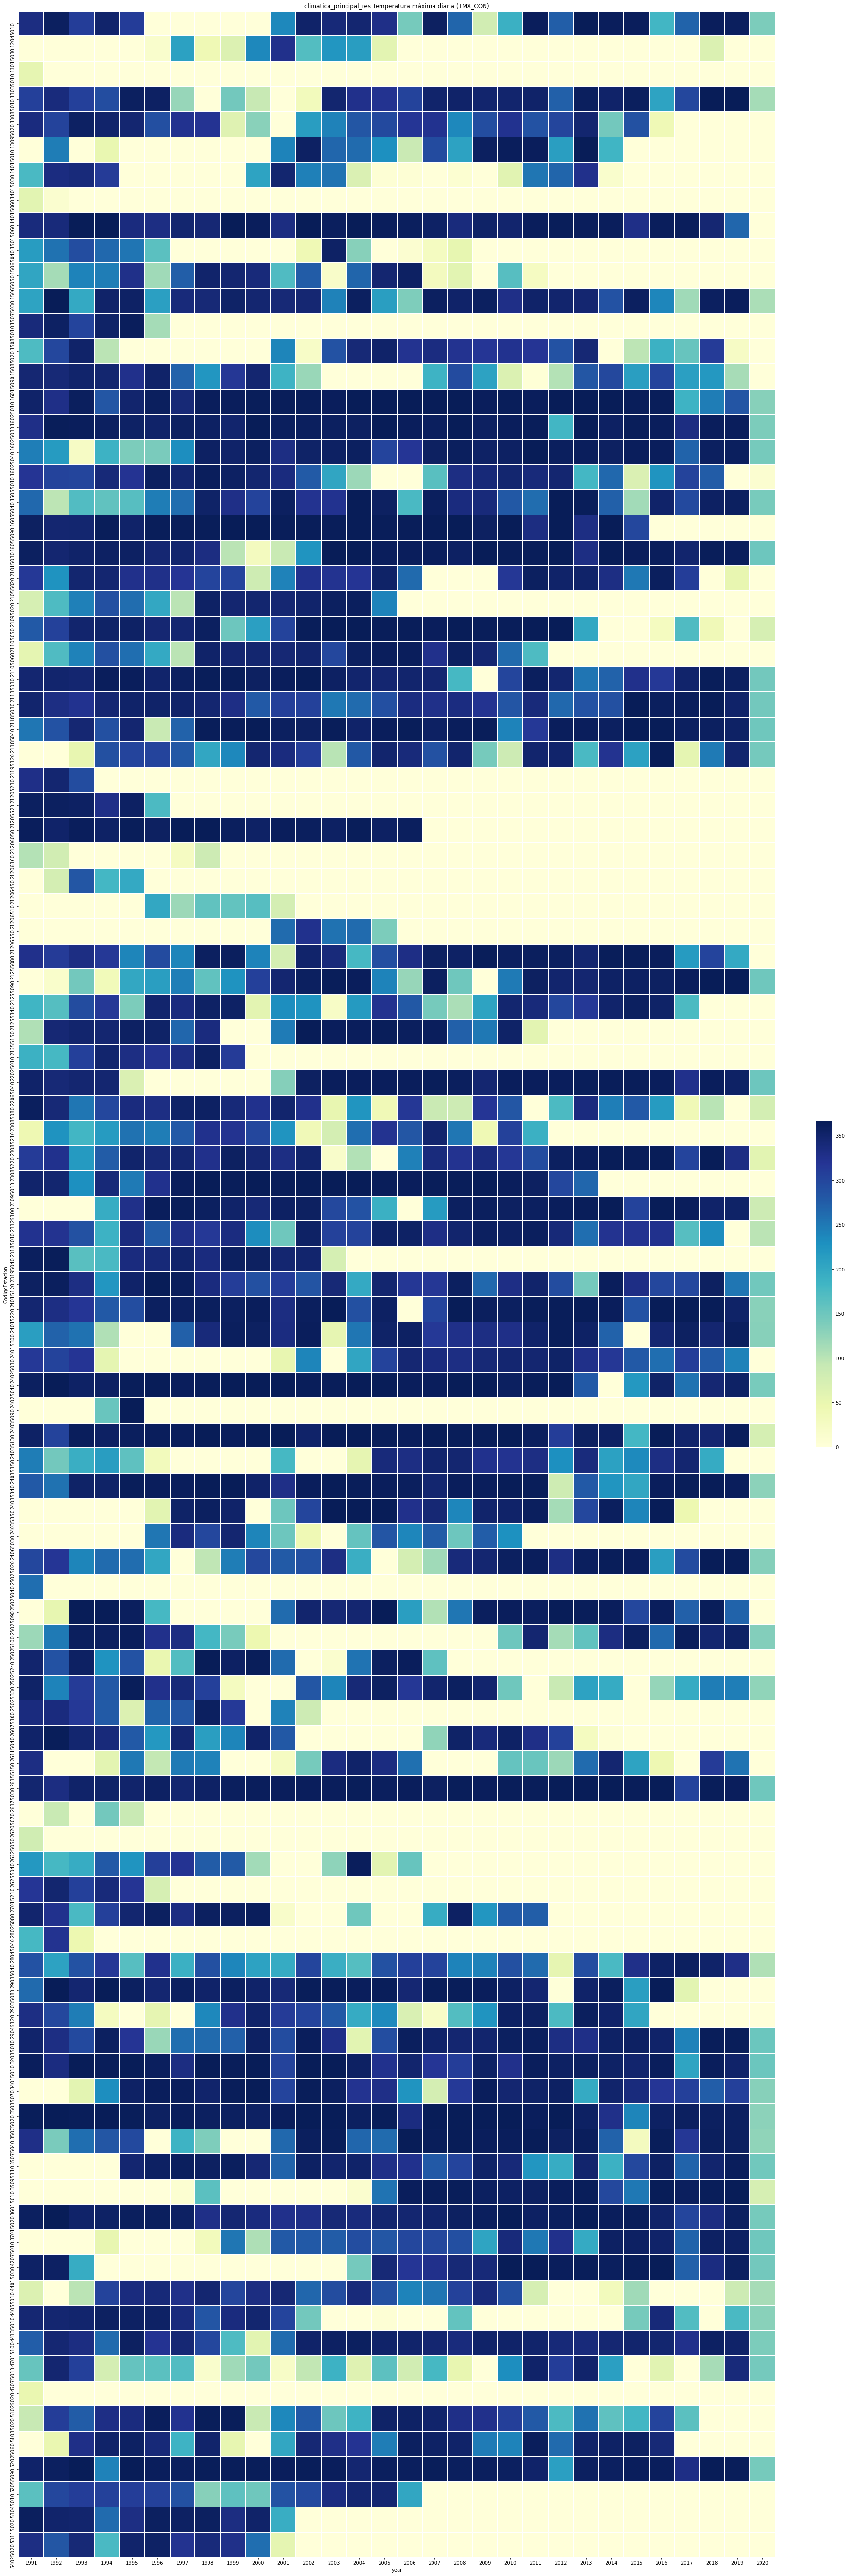

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,100))
ax = plt.axes()
ax.set_title(f"{estacion_type} {variable_perfil} ({etiqueta_perfil})")
sns.heatmap(data_estacion_year,
    square = True,
    cbar_kws = {'fraction' : 0.02},
    cmap = 'YlGnBu',
    linewidth = 1,
    #annot = True, fmt = "d",
    ax = ax
   )
#plt.show()
plt.savefig(f"{data_base}\\{data_filename}_{etiqueta_perfil}_estacion_year.png")

In [164]:
duplicatedata = data[data.duplicated(["CodigoEstacion","Etiqueta","Fecha","Valor"])]
duplicatedata.shape

In [164]:
#data_estacion_year.head()
#data_estacion_year[data_estacion_year.index == "11027010"]
#data[(data.CodigoEstacion == "11027010") & (data.Etiqueta == "Q_MEDIA_D") 
#     & (data.Fecha.dt.year == 1991) & (data.Fecha.dt.month == 1) & (data.Fecha.dt.day == 1)]

,CodigoEstacion,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
13596,11027010,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,1991-01-01,4.1,50,EST. OTROS METODOS,900
17458,11027010,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,1991-01-01,4.1,50,EST. OTROS METODOS,900


(857494, 10)

In [61]:
data_year_month = \
    (data[data.Frecuencia == "Diaria"]
     .groupby([data.Fecha.dt.month, data.Fecha.dt.year])["Valor"]
     .mean()
     .rename_axis(['month', 'year'])
     .unstack()
    )

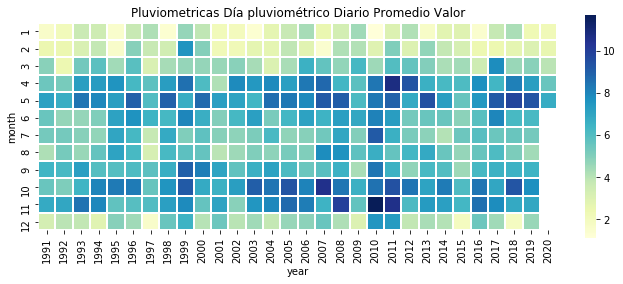

In [64]:
plt.figure(figsize=(10,10))

ax = plt.axes()
ax.set_title('Pluviometricas Día pluviométrico Diario Promedio Valor')
sns.heatmap(data_year_month,
    square = True,
    cbar_kws = {'fraction' : 0.02},
    cmap = 'YlGnBu',
    linewidth = 1,
    #annot = True#, fmt = "d"
    ax = ax
   )
plt.show()

In [81]:
#data.CodigoEstacion.cat.categories
#data.head()
estacion = ['11010010', '11020010', '11020020', '11020050', '11030030', '11030040','54030110', '54030120', '54030140', '54030150', '54030160', '54070030'] 
data_estacion = data[(data.CodigoEstacion.isin(estacion)) & (data.Frecuencia == "Diaria")]
data_estacion.CodigoEstacion.cat.remove_unused_categories(inplace=True)
data_estacion.head()

,CodigoEstacion,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,11010010,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,1991-01-01,0.0,50,NaN,900
1,11010010,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,1991-01-02,0.0,50,NaN,900
2,11010010,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,1991-01-03,24.9,50,NaN,900
3,11010010,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,1991-01-04,28.4,50,NaN,900
4,11010010,PRECIPITACION,PTPM_CON,Día pluviométrico,Diaria,1991-01-05,10.5,50,NaN,900


In [127]:
#pd.pivot_table(data_estacion, 
#    values='CodigoEstacion', index=[data_estacion.Fecha.dt.year], columns=[data_estacion.Fecha.dt.month],
#   aggfunc='count',margins=True)
data_estacion = data
data_estacion_dia = \
(data.groupby([data_estacion.Fecha.dt.year, data_estacion.Fecha.dt.month, "CodigoEstacion"])
 .Valor
 .size()
 .rename_axis(['year','month','CodigoEstacion'])
 .reset_index()
)

In [1]:
data_estacion_dia.head()
data_estacion_year_mount = data_estacion_dia.groupby(['year','month'])
data_estacion_year_mount
#sns.distplot(data_estacion_dia.loc[data_estacion_dia.month==1, 'Valor'], hist=True, kde=False, rug=False, label = "as", color = "red")
#.rename_axis(['year','month'])
    #.reset_index()
#     .reset_index(name='counts')
#)    

NameError: name 'data_estacion_dia' is not defined

In [ ]:
data_estacion_year_mount.head()